# Stellar Classification Dataset - SDSS17
데이터는 SDSS(Sloan Digital Sky Survey)에서 수집한 우주에 대한 100,000개의 관측값으로 구성되어 있습니다. 각 관측값은 17개의 특성 열과 1개의 클래스 열로 구성되어 있으며, 클래스 열은 해당 관측값이 별, 은하 또는 퀘이사 중 어떤 것인지를 식별합니다.

obj_ID = 객체 식별자, CAS에서 사용하는 이미지 카탈로그에서 해당 객체를 식별하는 고유값
alpha = 적경각 (J2000 기준)
delta = 적위각 (J2000 기준)
u = 자외선 필터의 분광계 체계에서의 값
g = 녹색 필터의 분광계 체계에서의 값
r = 빨간색 필터의 분광계 체계에서의 값
i = 근적외선 필터의 분광계 체계에서의 값
z = 적외선 필터의 분광계 체계에서의 값
run_ID = 특정 스캔을 식별하기 위해 사용되는 실행 번호
rereun_ID = 이미지 처리 방법을 지정하기 위한 재실행 번호
cam_col = 스캔라인을 식별하기 위한 카메라 열
field_ID = 각 필드를 식별하기 위한 필드 번호
spec_obj_ID = 광학 분광 객체에 사용되는 고유 식별자 (즉, 동일한 spec_obj_ID를 가진 두 관측값은 동일한 출력 클래스를 공유해야 함)
class = 객체 클래스 (은하, 별 또는 퀘이사(퀘이서) 객체)
redshift = 파장 증가에 기반한 적색편이값
plate = SDSS에서 각 판을 식별하는 판 ID
MJD = 수정 율리우스 날짜(MJD), 주어진 SDSS 데이터가 촬영된 시기를 나타내는 데 사용됨
fiber_ID = 각 관측에서 초점면에 빛을 비추는 광섬유를 식별하는 광섬유 ID

# 설명
천문학에서, 항성 분류는 항성의 스펙트럼 특성에 기초하여 분류하는 것입니다. 은하, 퀘이사, 별의 분류 체계는 천문학에서 가장 기본적인 것 중 하나입니다. 별들의 초기 분류와 하늘에서의 분포는 그것들이 우리 은하를 구성한다는 이해로 이어졌고 안드로메다가 우리 은하와 별개의 은하라는 구별에 따라, 더 강력한 망원경이 만들어지면서 수많은 은하들이 조사되기 시작했습니다. 이 데이터셋은 스펙트럼 특성에 따라 별, 은하 및 퀘이사를 분류하는 것을 목표로 합니다.

# 라이브러리 설치
- Numpy
- Pandas
- MatPlotLib
- Seaborn
- xgboost
- lightgbm
- catboost

In [4]:
%pip install Numpy
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn
%pip install xgboost
%pip install lightgbm
%pip install catboost

You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: lightgbm in c:\users\white\desktop\학교\2023\지구과학\.venv\lib\site-packages (3.3.5)



You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\white\Desktop\학교\2023\지구과학\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


# 라이브러리 Import

In [3]:
# 분석용 라이브러리
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(13,8)})

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# 학습용 라이브러리
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold
fold = StratifiedKFold(n_splits=4, shuffle = True, random_state=62)
from sklearn.model_selection import cross_val_score

In [10]:
# .csv 파일 로딩
df = pd.read_csv("./dataset.csv")

# .csv 체크
df.info()

# 데이터 크기 확인 (행, 열)
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

(100000, 18)

In [19]:
df.head()

,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,0,0.116123,6121,56187,842


In [15]:
# class를 제외한 모든 feature가 숫자로 되어있음.
df["class"].dtype

dtype('int32')

In [16]:
# 분석을 편하게 하기 위해 class열의 데이터를 labelencoding을 통하여 숫자로 변환함.
le = LabelEncoder()
df["class"] = le.fit_transform(df["class"])
df["class"] = df["class"].astype(int)

In [14]:
# 변환 완료 (object -> int32)
df["class"].dtype

dtype('int32')

In [17]:
# 그래프 표시를 위한 함수 선언

# plot : 일반적인 x, y축의 형태로 표현
def plot(column):
    for i in range(3):
        sns.kdeplot(data=df[df["class"] == i][column], label = le.inverse_transform([i]))
    sns.kdeplot(data=df[column],label = ["All"])
    plt.legend();

# log_plot : x 또는 y축을 log 단위의 그래프로 표현
def log_plot(column):
    for i in range(3):
        sns.kdeplot(data=np.log(df[df["class"] == i][column]), label = le.inverse_transform([i]))
    sns.kdeplot(data=np.log(df[column]),label = ["All"])
    plt.legend();

In [18]:
# id는 은하계 분류와 연관이 없기 때문에 drop
# drop : 분석용/모델 학습을 위한 데이터에서 제외
df = df.drop(["obj_ID"],axis=1)

In [20]:
# 출력된 0번~5번 행까지 301로 동일한 rerun_ID 열의 데이터가 100,000번째까지 같은 데이터인지 확인
df["rerun_ID"].nunique()

1

In [21]:
# 특징성이 없으므로 rerun_ID도 drop
df = df.drop("rerun_ID",axis=1)

# 본격적으로 데이터 분석 시작
그래프 중 선[0] = GALAXY (은하)
그래프 중 선[1] = QSO (퀘이사)
그래프 중 선[2] = STAR (별)

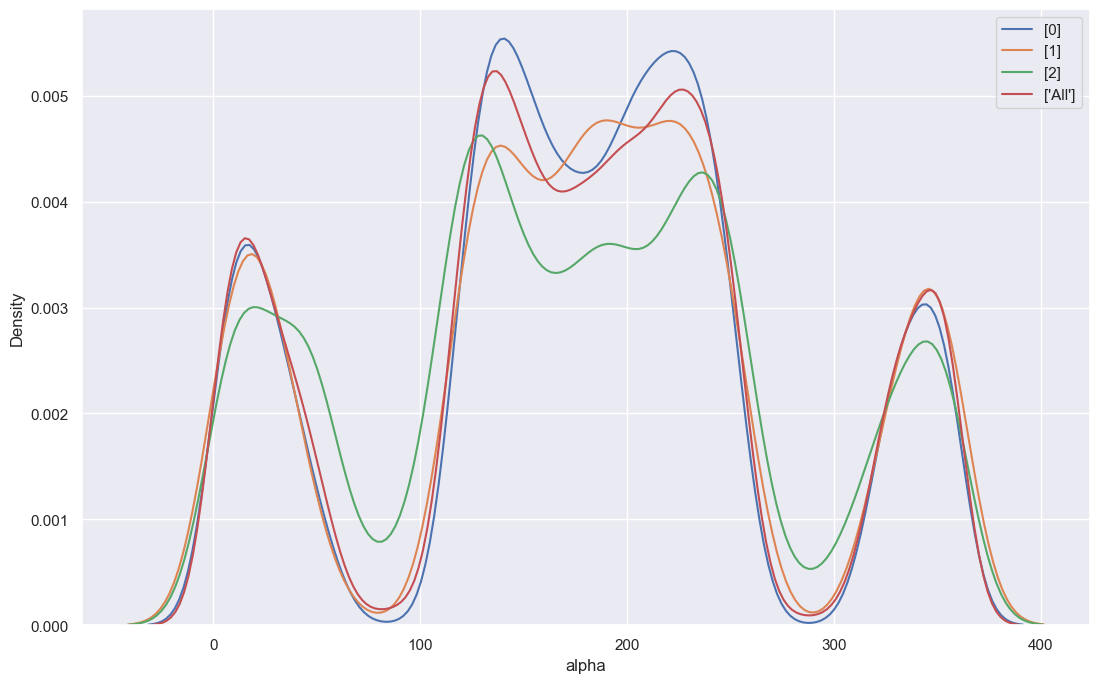

In [26]:
# alpha = 적경각 (J2000 기준)
# class별로 골고루 분포가 퍼져있으나 star class의 특징이 보이기 때문에 keep
plot("alpha")

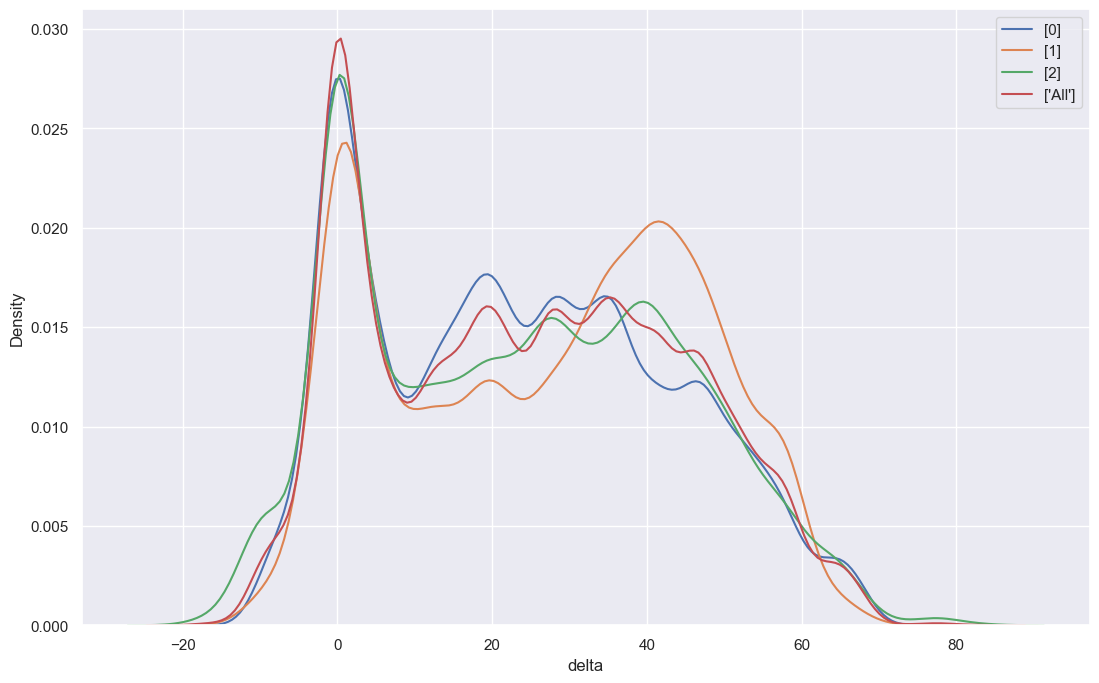

In [24]:
# 적위각 (J2000 기준)
# class별로 골고루 분포가 퍼져있으나 qso class의 특징이 보이기 때문에 keep
plot("delta")

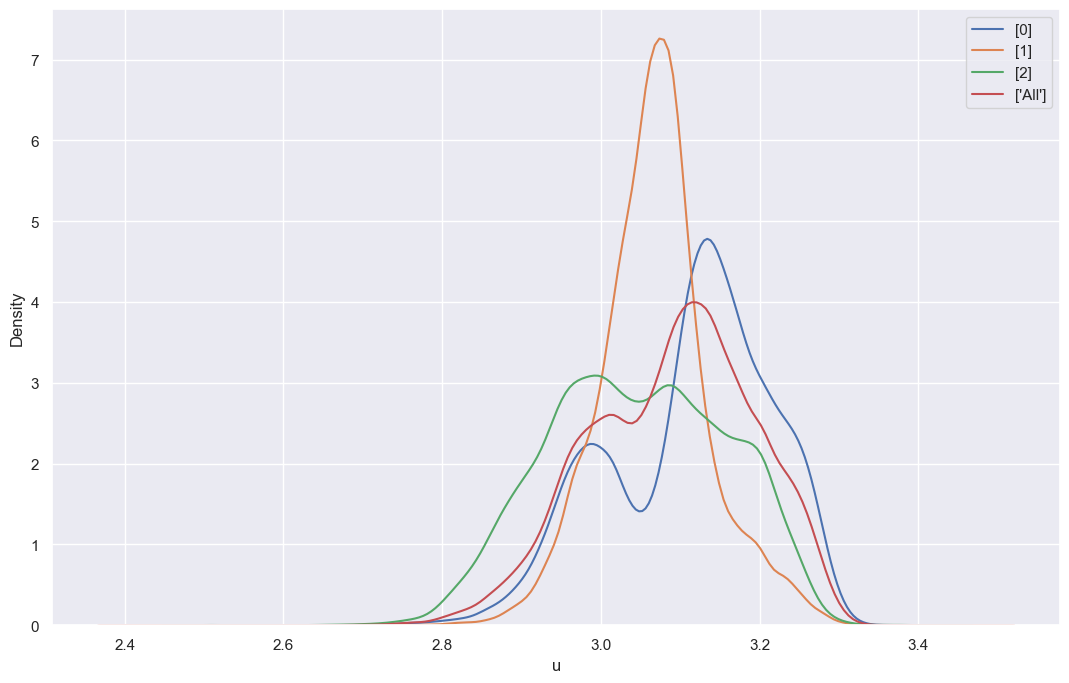

In [25]:
# u : 측광 시스템의 자외선 필터값
# 일반 plot()으로 시각화하면 극단적인 값으로 인해 시각화가 불가능
# 따라서 log_splot()으로 시각화하여 단위를 log로 변경
# qso class의 특징이 보이기 때문에 keep
log_plot("u")

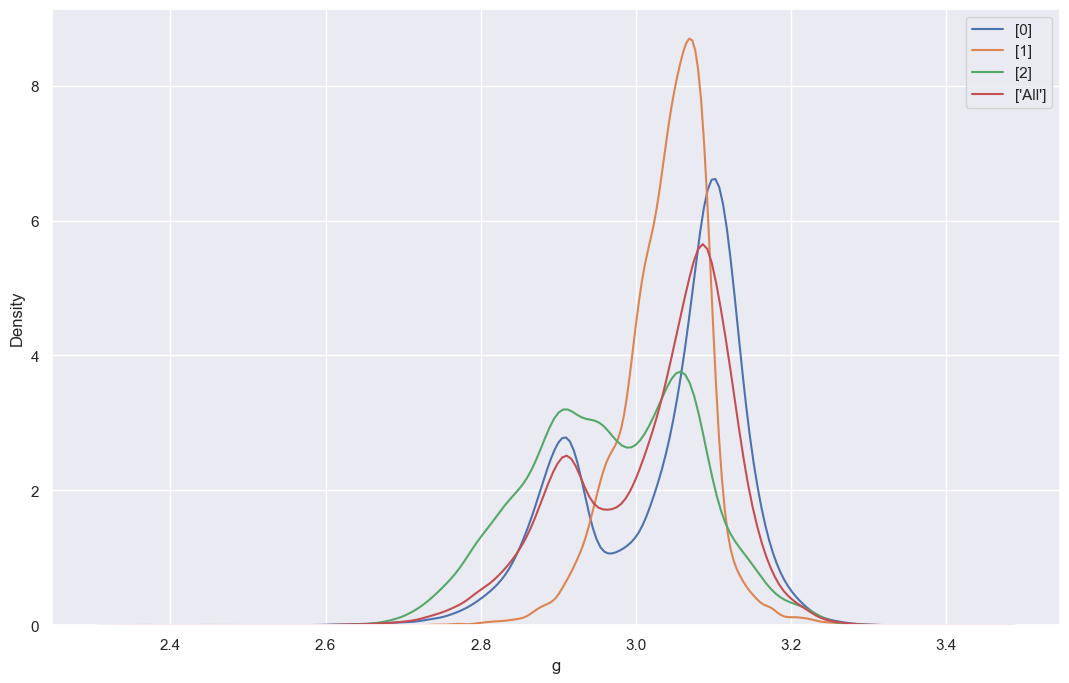

In [27]:
# g : 측광 시스템의 녹색 필터
# 마찬가지로 극단적인 값으로 인해 일반적인 시각화가 불가능하여 축 단위를 log로 적용
# qso class에 조금의 특징이 있으므로 keep
log_plot("g")

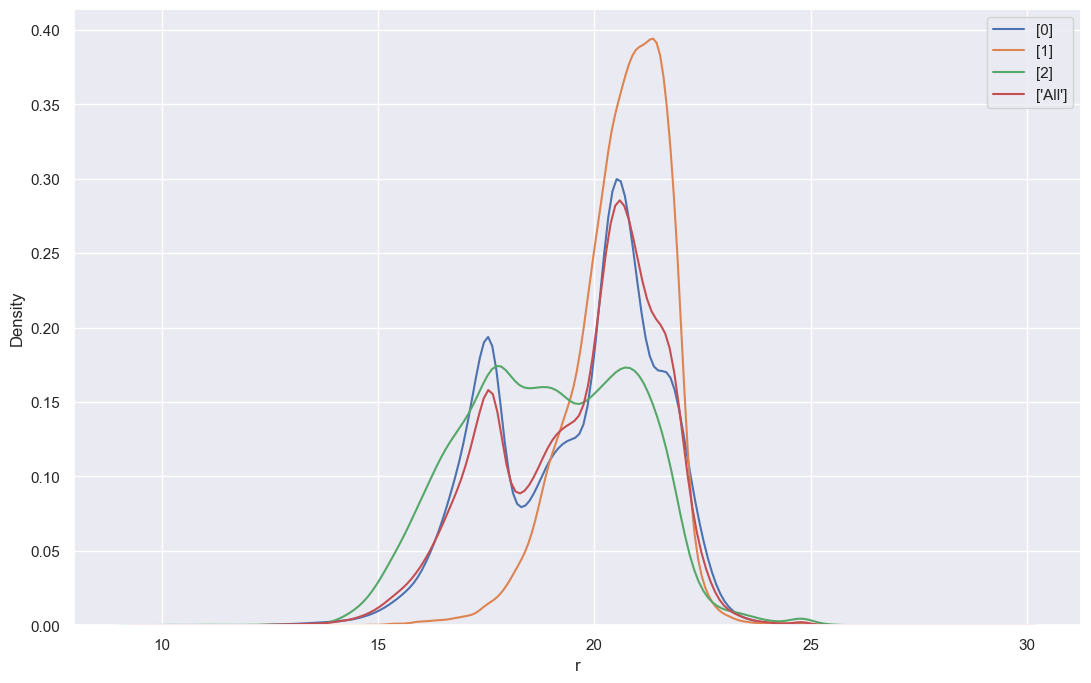

In [29]:
# r : 측광 시스템의 빨간색 필터
# 비교적 큰 값이 아니므로 plot()으로 시각화
# qso class에 조금의 특징이 있으므로 keep
plot("r")

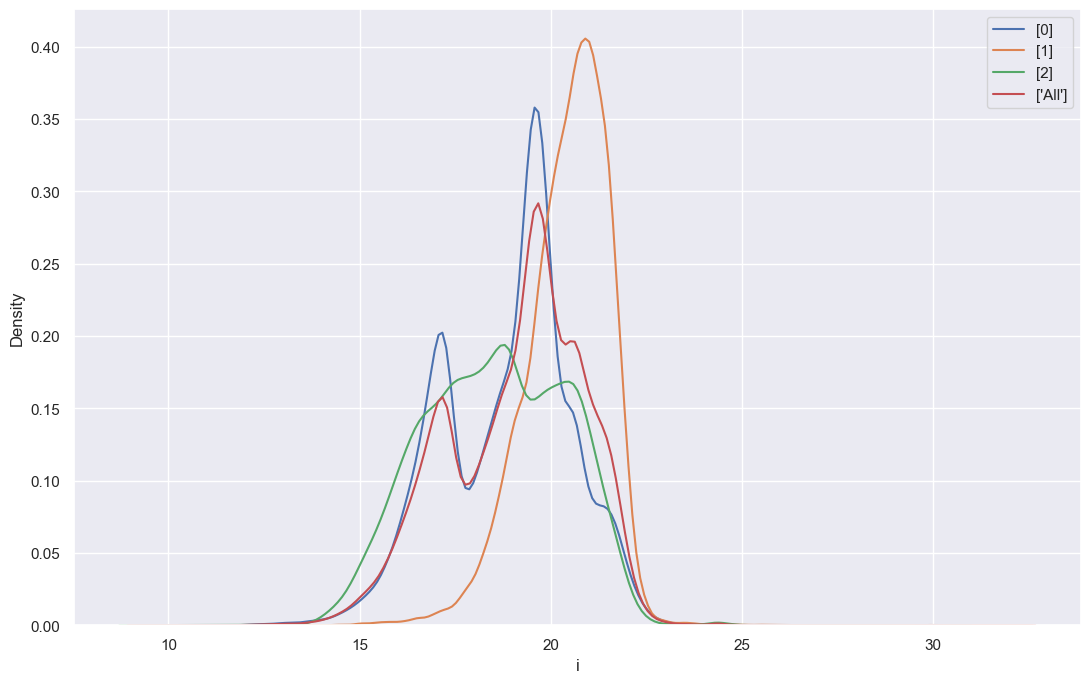

In [31]:
# i : 측광 시스템의 근적외선 필터
# 비교적 큰 값이 아니므로 plot()으로 시각화
# qso class에 조금의 특징이 있으므로 keep
plot("i")

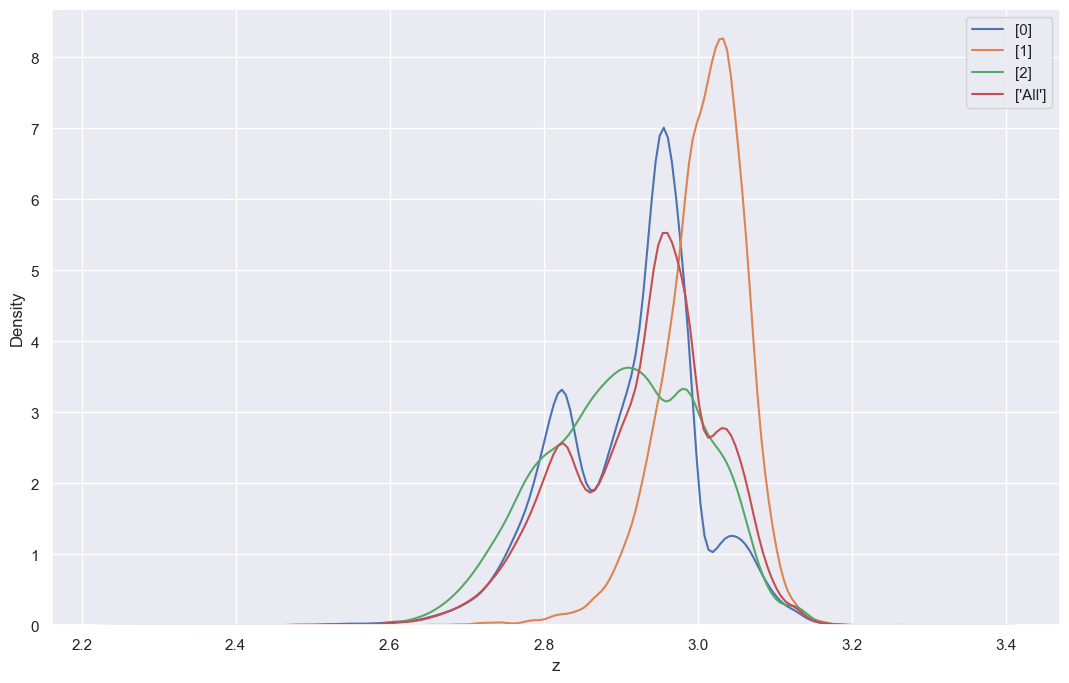

In [32]:
# z : 측광 시스템의 적외선 필터
# 극단적인 값으로 인해 일반적인 시각화가 불가능하여 축 단위를 log로 적용
# qso class에 조금의 특징이 있으므로 keep
log_plot("z")

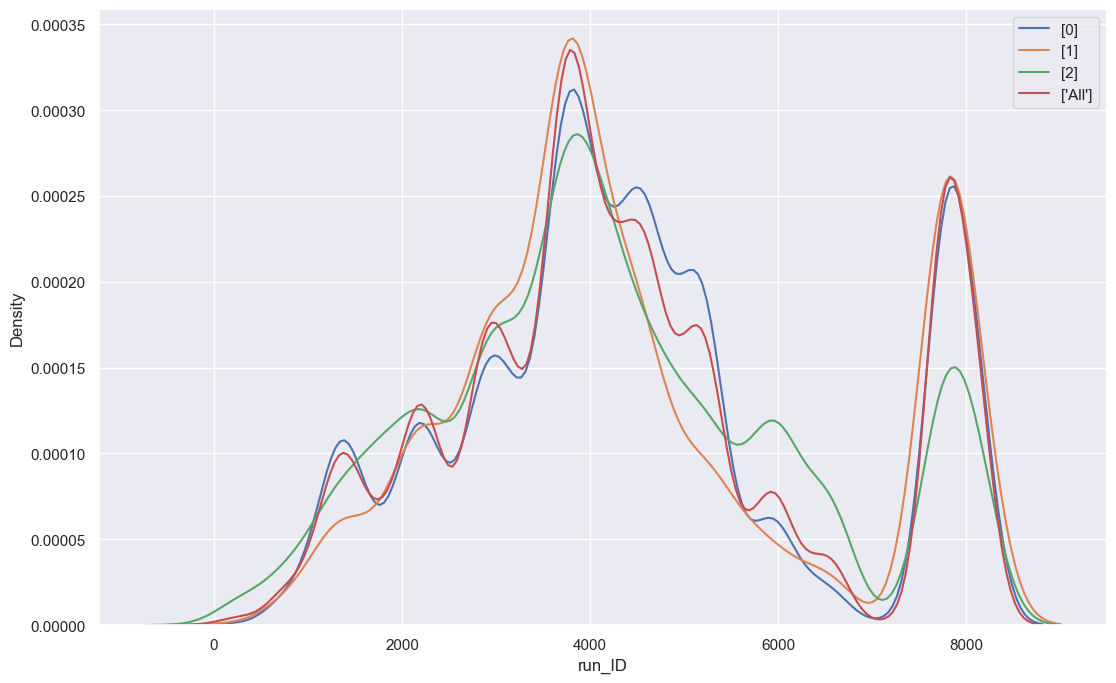

In [33]:
# run_ID : 특정 스캔을 식별하는 데 사용되는 실행 번호
plot("run_ID")

In [34]:
# 확인 결과 class별로 분포에 의미있는 차이가 없으므로 run_ID 열은 drop
df = df.drop("run_ID",axis=1)

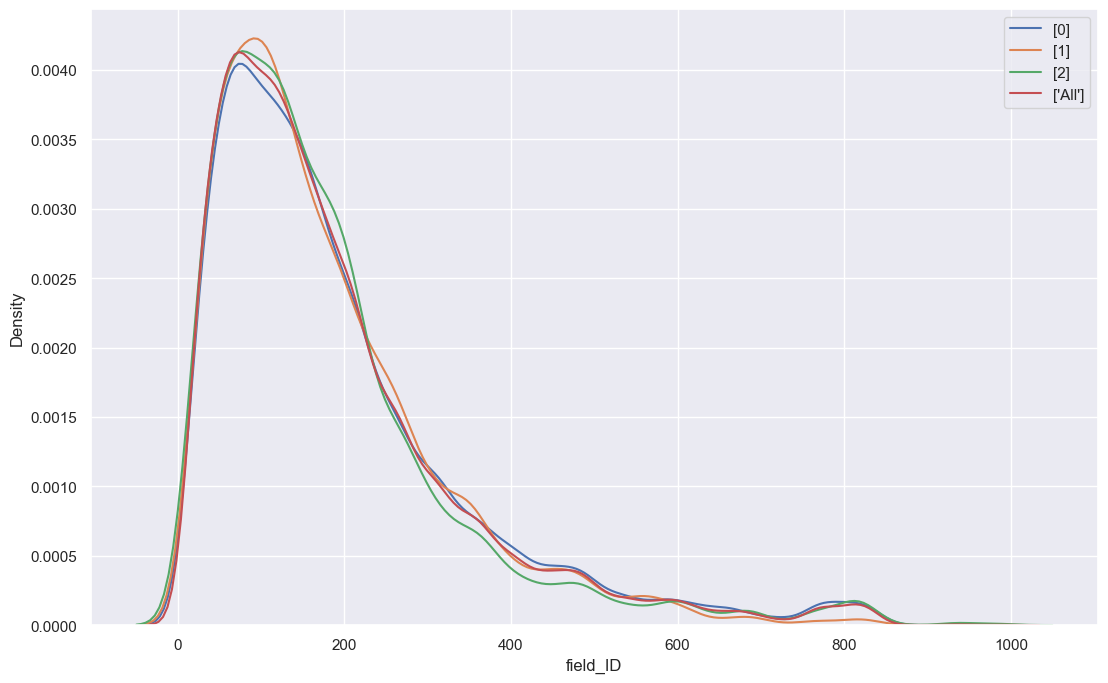

In [35]:
# field_ID : 각 필드를 식별하기 위한 필드 번호
plot("field_ID")

In [36]:
# 마찬가지로 class별로 의미있는 차이가 없기 때문에 drop
df = df.drop("field_ID",axis=1)

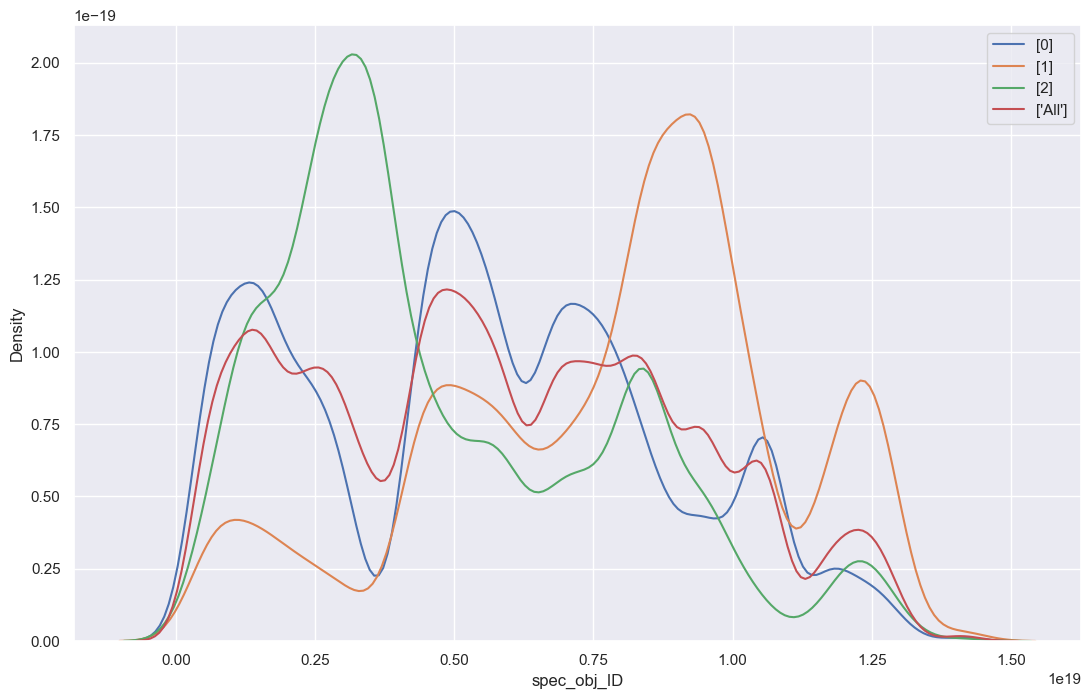

In [38]:
# spec_obj_ID : 광학 스펙트럼 분석 물체에 사용되는 고유 ID
# spec_obj_ID는 class별로 특징이 보이므로 drop하지 않음
plot("spec_obj_ID")

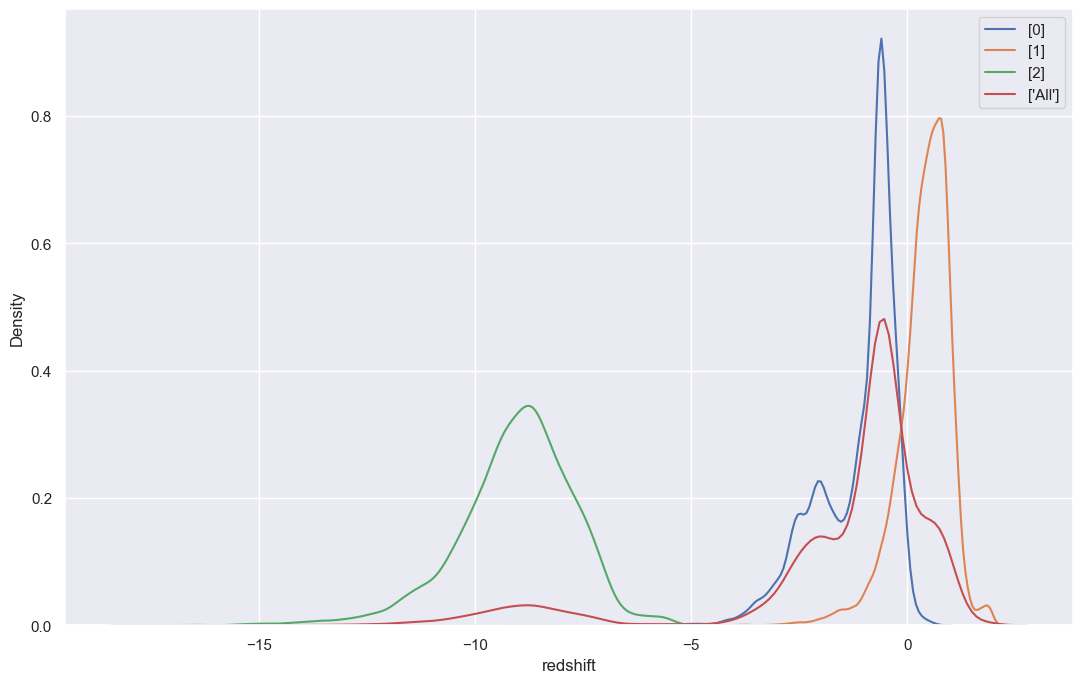

In [42]:
# redshift : 파장 증가에 따른 적색편이 값
# 극단적인 값이 있으므로 축을 log단위로 변환하여 시각화
# class별로 특징이 보임
log_plot("redshift")

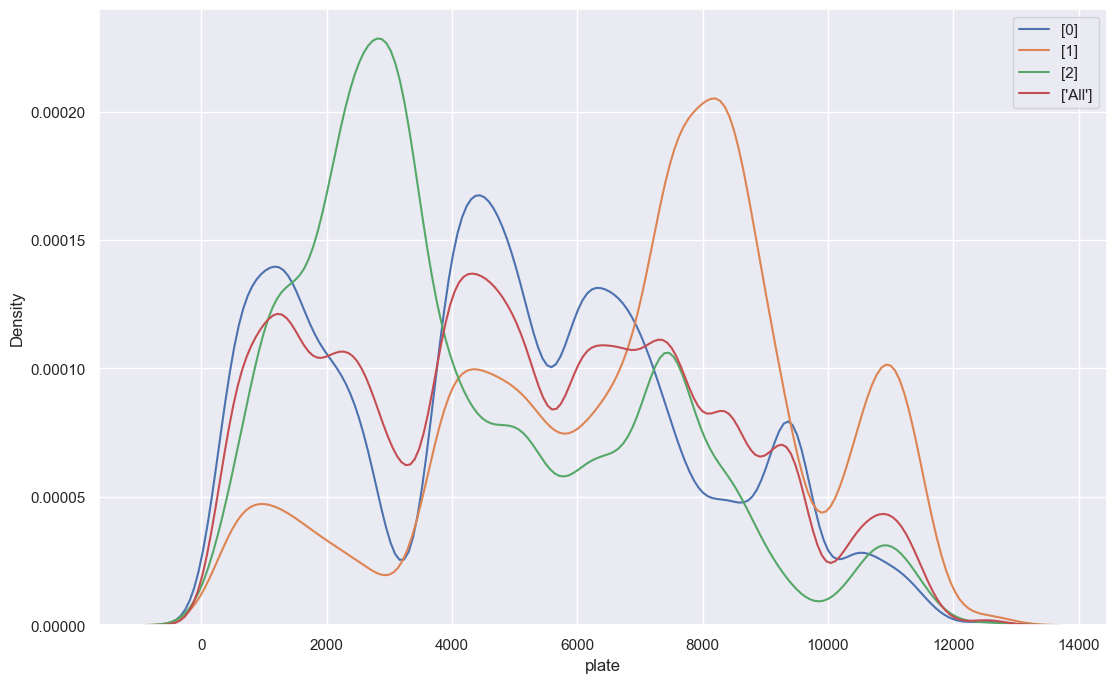

In [44]:
# plate : SDSS에서 각 Plate를 식별하는 Plate ID
# 약간 특징이 미미하지만 특정 class에서 크게 나타나므로 drop하지 않음
plot("plate")

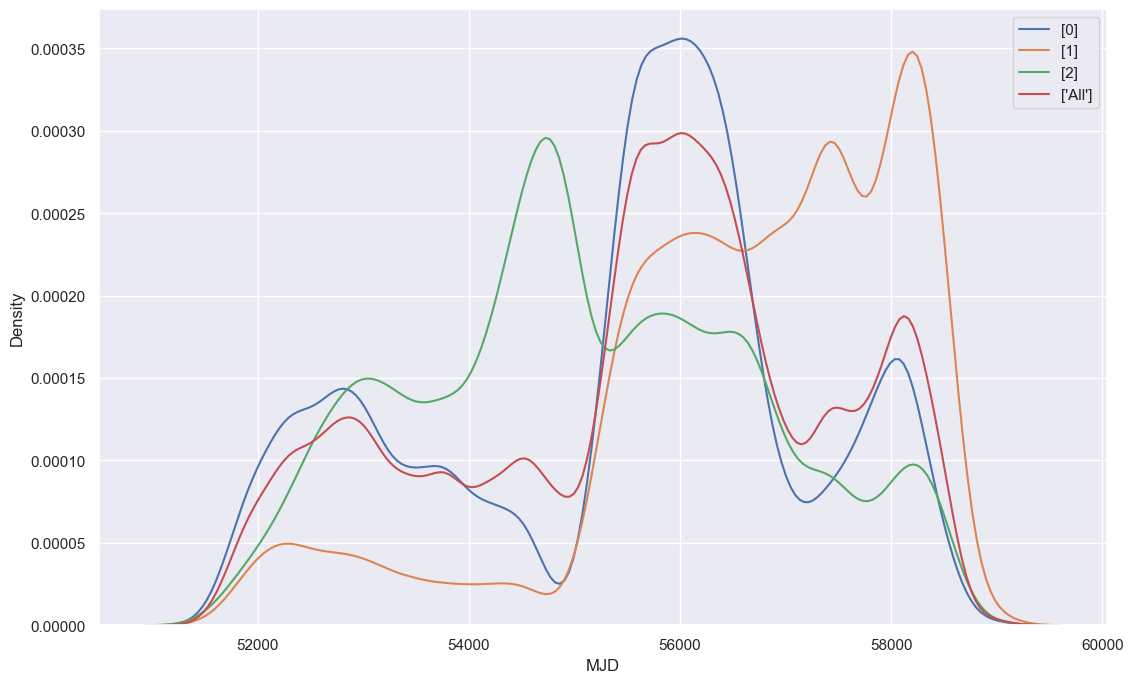

In [45]:
# MJD : 주어진 SDSS 데이터가 촬영된 시기, 단 율리우스력 날짜임
# class 별로 특징이 보이므로 drop하지 않음
plot("MJD")

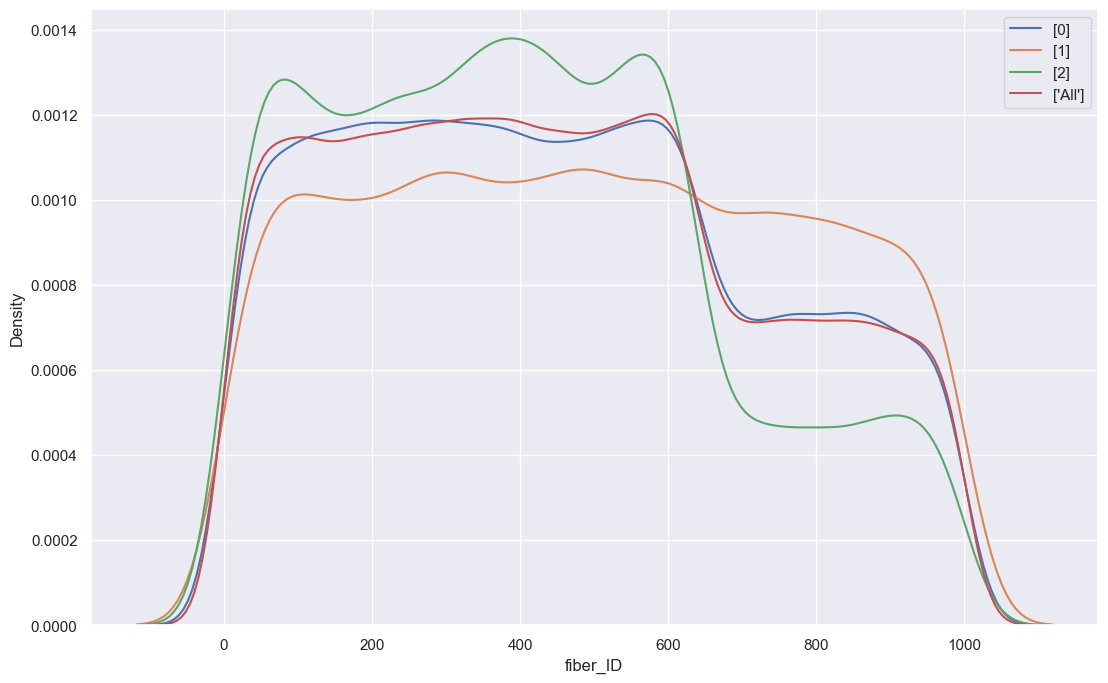

In [46]:
# fiber_ID : 각 관측에서 초점면에 빛을 비추는 광섬유를 식별하는 광섬유 ID
plot("fiber_ID")

In [47]:
# class별로 차이(소수점 4자리)가 없으므로 drop
df = df.drop("fiber_ID",axis=1)

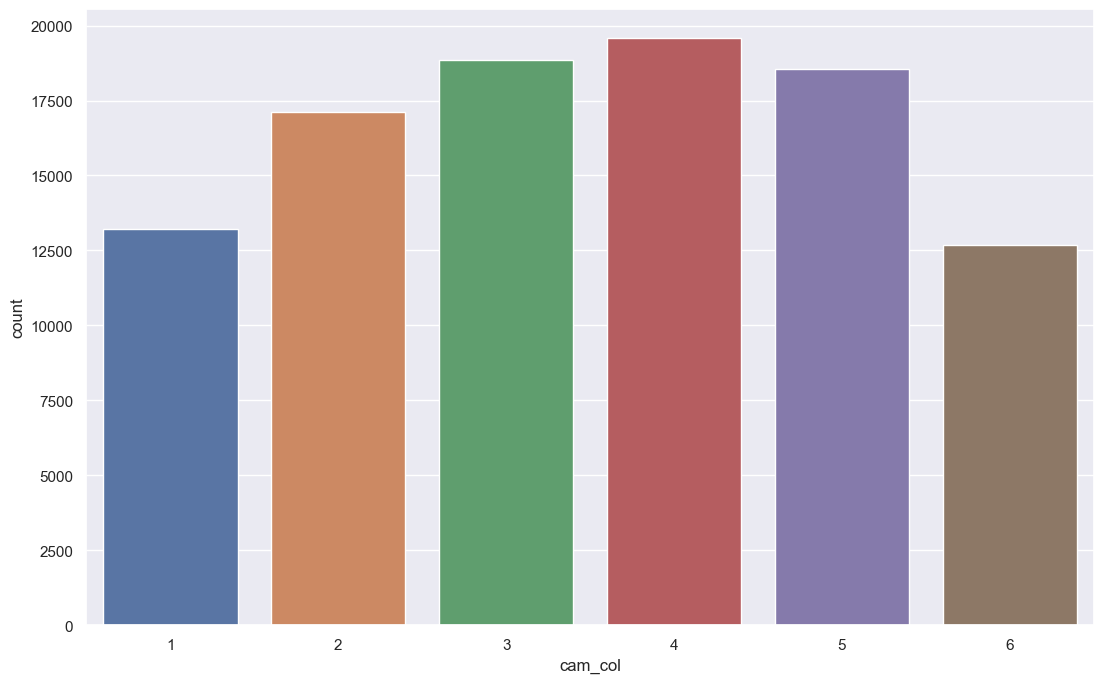

In [49]:
# cam_col : 스캔라인을 식별하기 위한 카메라 열
# 4번에 20000개 가까이 분포가 되어있인 하나 다른 열 번호들도 10000개 이상이기 때문에 나름 골고루 분포되어있음
sns.countplot(x=df["cam_col"]);

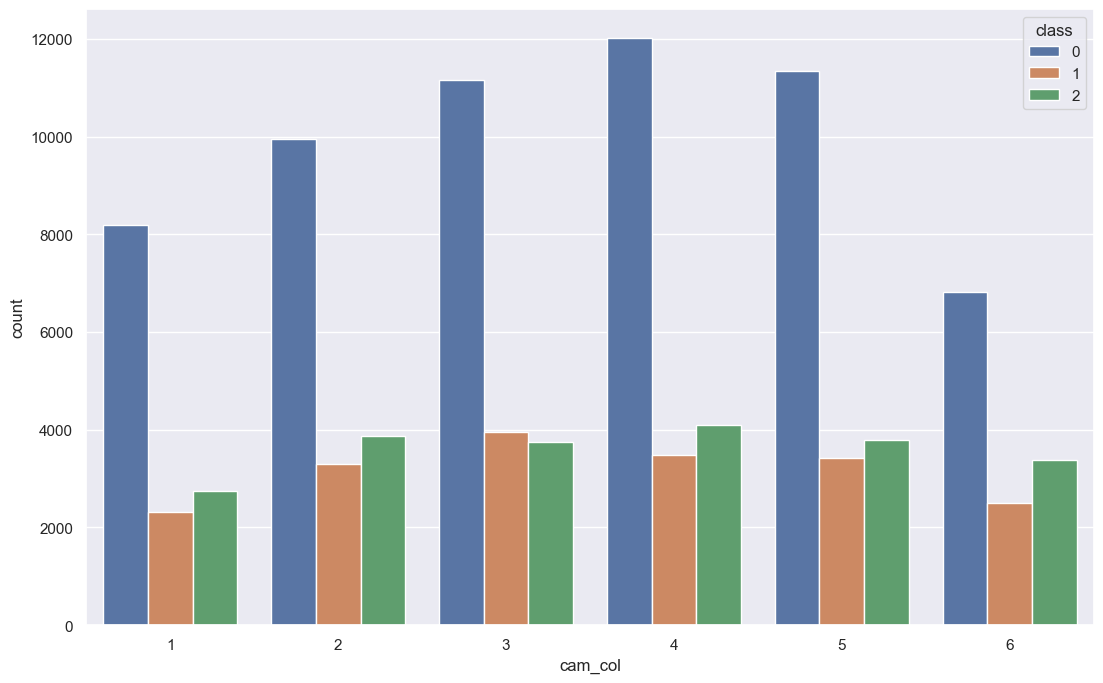

In [52]:
# cam_col이 나름 골고루 분포되어있었으나 각 번호별로 거의 동일한 비율로 class를 스캔함
sns.countplot(x=df["cam_col"],hue=df["class"]);

In [53]:
# 따라서 cam_col로 class를 구별하기엔 힘들어 보이므로 drop
df = df.drop("cam_col",axis=1)

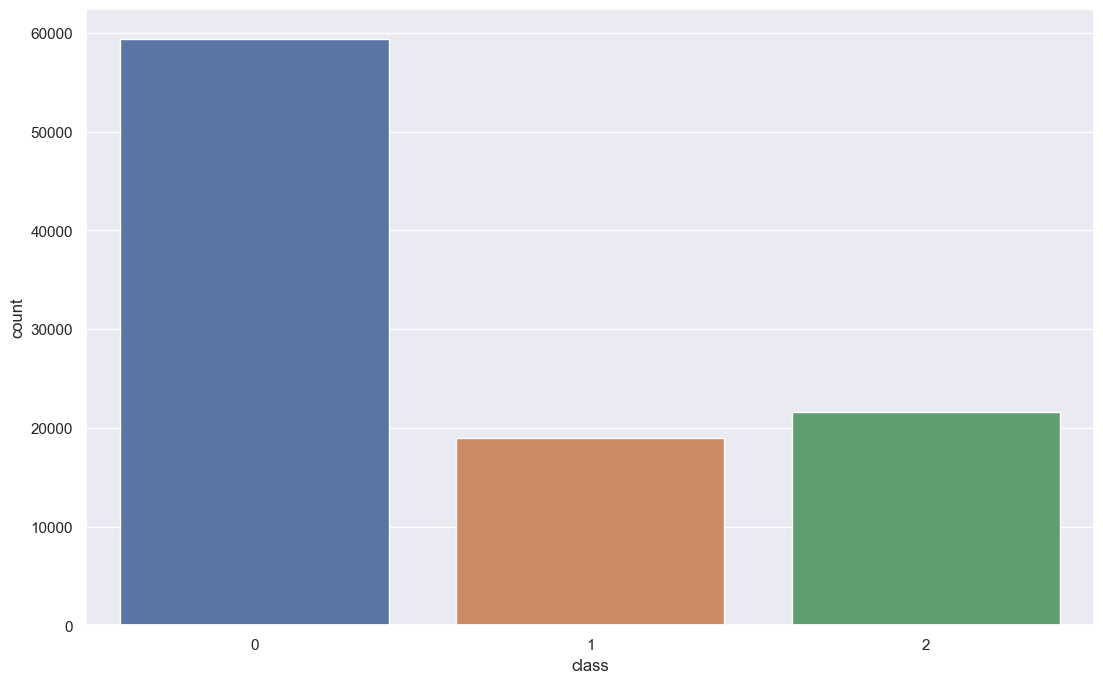

In [55]:
# class 분포 확인
# 0번 class, 즉 GALAXY (은하)의 데이터가 다른 class보다 많음
sns.countplot(x=df["class"]);

In [56]:
# 인공지능을 통해 분류를 Test하기 위해 미리 구별되어 표시된 class열 데이터 drop
X = df.drop(["class"],axis=1)
y = df["class"]

In [57]:
# LGBM 알고리즘으로 학습 및 검증 cross_validation로 정확도 검사

model = LGBMClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

0.97885


In [58]:
# RandomForest 알고리즘으로 학습 및 검증 cross_validation로 정확도 검사
model = RandomForestClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

0.97905


In [59]:
# XGB 알고리즘으로 학습 및 검증 cross_validation로 정확도 검사
model = XGBClassifier(eval_metric = "merror")
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

0.97946


In [60]:
# GradientBoost 알고리즘으로 학습 및 검증 cross_validation로 정확도 검사
model = GradientBoostingClassifier()
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

0.97615


In [61]:
# CatBoost 알고리즘으로 학습 및 검증 cross_validation로 정확도 검사
model = CatBoostClassifier(verbose=0)
score = cross_val_score(model , X , y ,cv=fold)
print(np.mean(score))

0.97825
